In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm.notebook import tqdm

In [18]:
! pip install tqdm

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


## Data Loading and Pre-Processing

In [ ]:
### Get zcta_county information
# zcta_county=pd.read_csv('outputs/ZCTA_CountyInfo.csv',usecols=['ZCTA','NAME'])

### Read full results and merge conunty info
# gtwr_full_results = pd.read_csv('outputs/4_plus_1/Full_TimeRange_run/gtwr_coeff_Hispanic_[fixed-AllZcta-AllWeeks]_[bw-0.4_tau-4000].csv')
# gtwr_full_results = gtwr_full_results.merge(zcta_county, on = 'ZCTA', how = 'left')

In [ ]:
# res_col_list = list(gtwr_full_results.columns[0:8]) + list(gtwr_full_results.columns[34:50])
# gtwr_full_results = gtwr_full_results[gtwr_full_results.columns.intersection(res_col_list)]

In [3]:
### Read full data already organized 
gtwr_full_results = pd.read_csv('gtwr_coeff_for_plot.csv')

### Mean/Median of coeff of all ZCTAs, for each week
#weekly_median_allZCTA = gtwr_full_results.groupby('Week')['Hispanic'].median().reset_index()


### Make pivot table for heatmap
#median_gtwr_full_results = weekly_median_allZCTA.melt(id_vars = 'Week',
#                                                      value_vars = ['Hispanic'],
#                                                      var_name = 'Predictors',
#                                                      value_name = 'Coefficient')

#pivot_median_gtwr_full_results = median_gtwr_full_results.pivot(index='Predictors',columns='Week',values='Coefficient')

# Plot Heat Map and Line Plot [Single Var]

In [14]:
def linePlot_withIQR(df, x_col_name, fist_y_col_name, second_y_col_name, plot_second_y=True, nth_ticks=3, save_fig=False, save_fig_path='', save_fig_filename='lineplot.png'):
    fig,ax =  plt.subplots(figsize = (12, 5))
    
    # plot 1st y-axis
    sns.lineplot( x = x_col_name, y = fist_y_col_name, 
                 estimator='median', ci=None, 
                 color = 'b', data = df, 
                 ax = ax)  
    bounds = df.groupby(x_col_name)[fist_y_col_name].quantile((0.25,0.75)).unstack()
    ax.fill_between(x=bounds.index,y1=bounds.iloc[:,0],y2=bounds.iloc[:,1],alpha=0.1,
                   color='b')
    
    # Hide every n-th ticks
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % nth_ticks != 0:
            label.set_visible(False)
    
    # plot 2nd y-axis
    if plot_second_y:
        ax0_1 = ax.twinx()
        sns.lineplot( x = x_col_name, y = second_y_col_name, 
                     estimator='median', ci=None,
                     color = 'gray', data = df, 
                     ax = ax0_1)  
        bounds = df.groupby(x_col_name)[second_y_col_name].quantile((0.25,0.75)).unstack()
        ax0_1.fill_between(x=bounds.index,y1=bounds.iloc[:,0],y2=bounds.iloc[:,1],alpha=0.1,
                           color='gray')
        
        # Hide every n-th ticks
        for index, label in enumerate(ax0_1.xaxis.get_ticklabels()):
            if index % nth_ticks != 0:
                label.set_visible(False)

    # Add a horizontal line
    ax.axhline(linewidth=0.15, color = 'black')
    ax.tick_params(labelrotation = 90)
    fig.tight_layout()  # fig.tight_layout(pad = 1.2)

    if save_fig:
        fig.savefig(f"{save_fig_path}\\{save_fig_filename}", dpi=300)
    
    
def heatmap_withPivot(pivot_table, var, nth_ticks=3, save_fig=False, save_fig_path='', save_fig_filename='heatmap.png'):
    fig, ax = plt.subplots(figsize=(12, 2))
    sns.heatmap(pivot_table.loc[var],cmap=sns.color_palette('YlOrBr',as_cmap=True), xticklabels=3, robust = True)

    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % nth_ticks != 0:
            label.set_visible(False)
    
    if save_fig:
        fig.savefig(f"{save_fig_path}\\{save_fig_filename}", dpi=300)

<ipython-input-14-74b98db4157c>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = fist_y_col_name,
<ipython-input-14-74b98db4157c>:21: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = second_y_col_name,


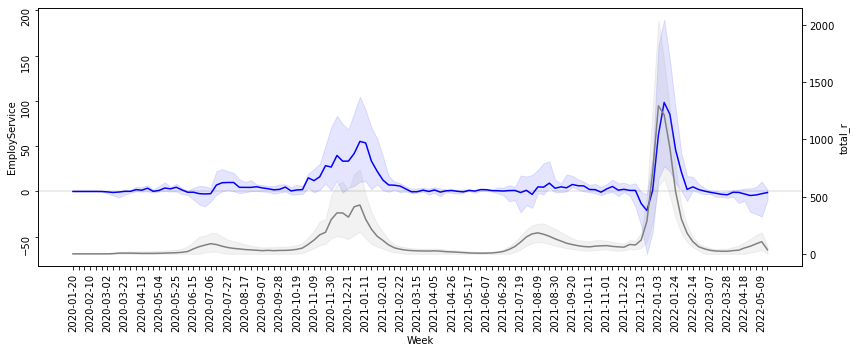

In [15]:
### Plot single heatmap
#heatmap_withPivot(pivot_median_gtwr_full_results, var=['Hispanic'], 
#                  save_fig=True, save_fig_path=os.getcwd(), 
#                  save_fig_filename='heatmap.png')

### Plot single Line Plot with Rate
linePlot_withIQR(gtwr_full_results, 'Week','EmployService', 'total_r', plot_second_y=True, 
                 save_fig=True, save_fig_path=os.getcwd(), 
                 save_fig_filename='line_plot_EmployService.png')

  0%|          | 0/13 [00:00<?, ?it/s]

<ipython-input-26-2fe8cac44ab4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = fist_y_col_name,
<ipython-input-26-2fe8cac44ab4>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = second_y_col_name,
<ipython-input-26-2fe8cac44ab4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = fist_y_col_name,
<ipython-input-26-2fe8cac44ab4>:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = second_y_col_name,
<ipython-input-26-2fe8cac44ab4>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( x = x_col_name, y = fist_y_col_name,
<ipython-input-26-2fe8cac44ab4>:22: FutureWarning: 

The `ci` parameter is deprecated. Us

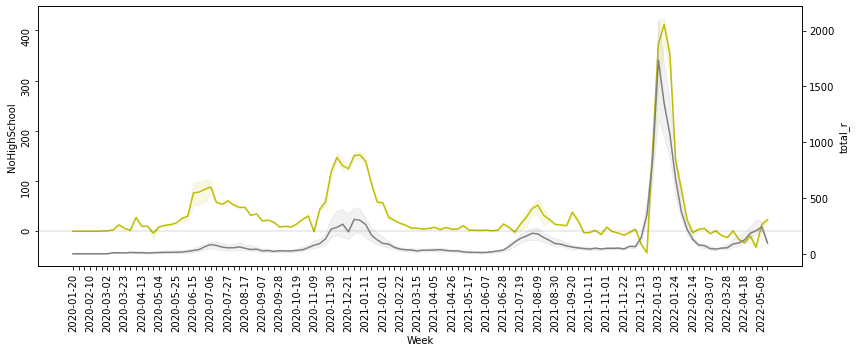

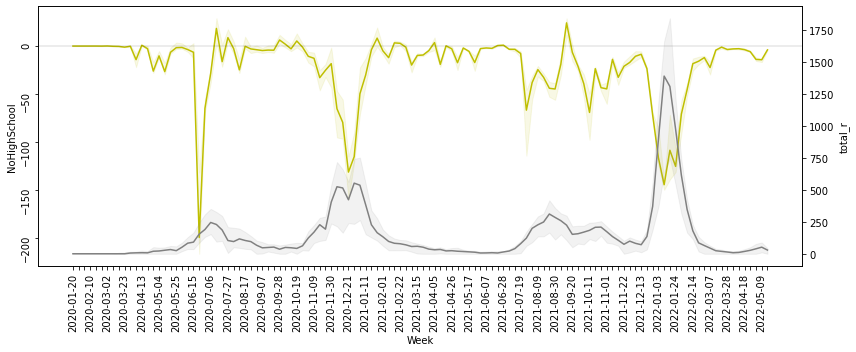

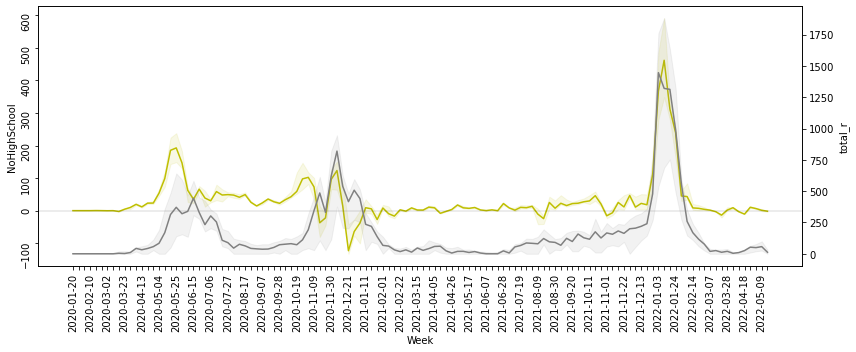

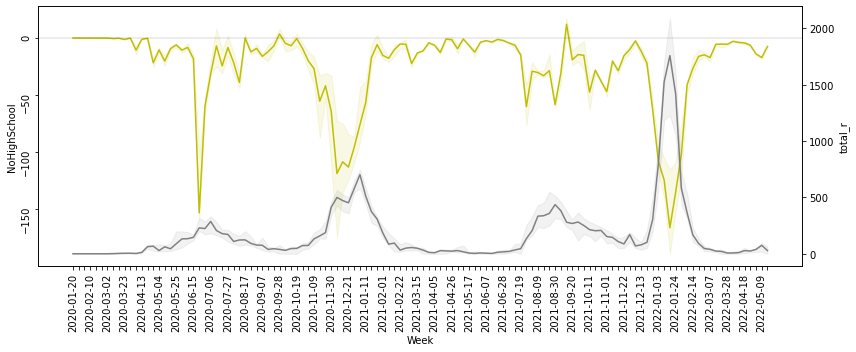

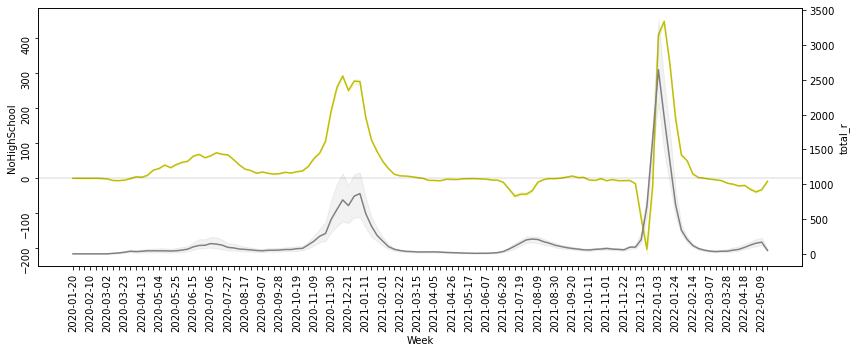

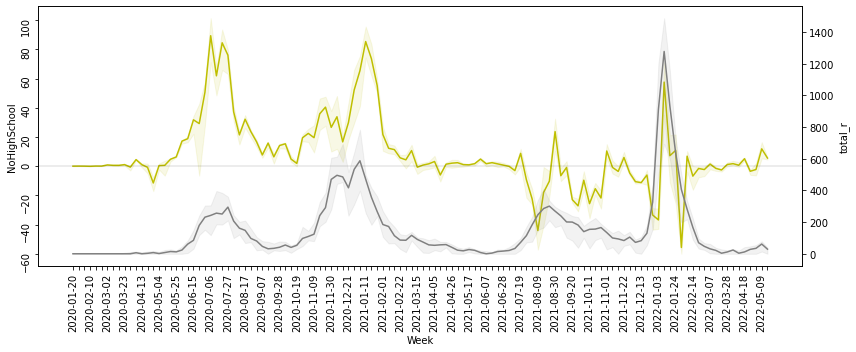

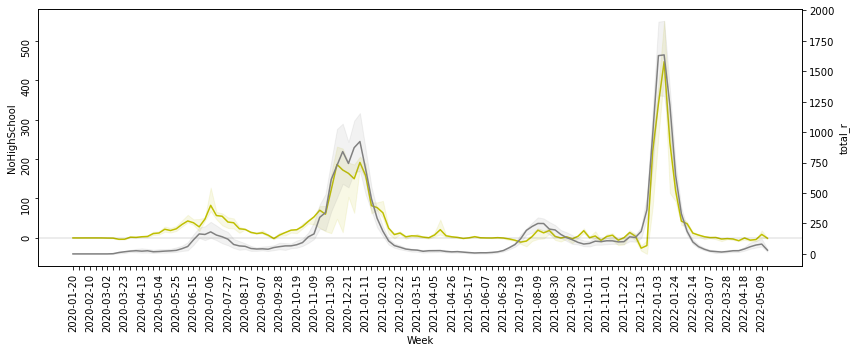

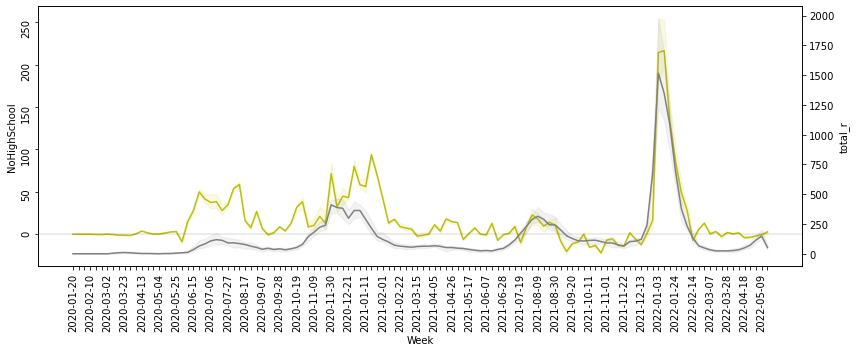

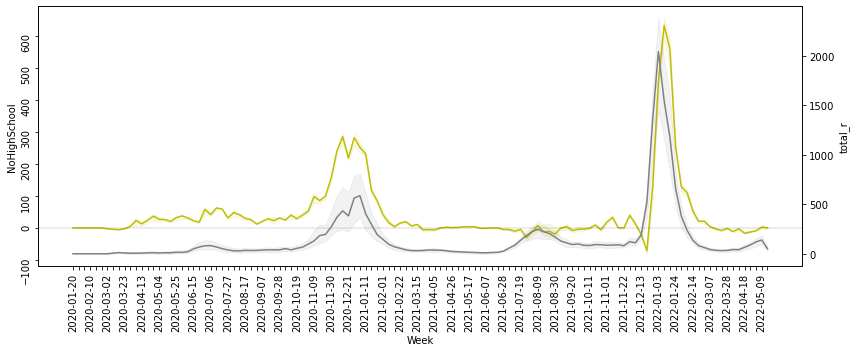

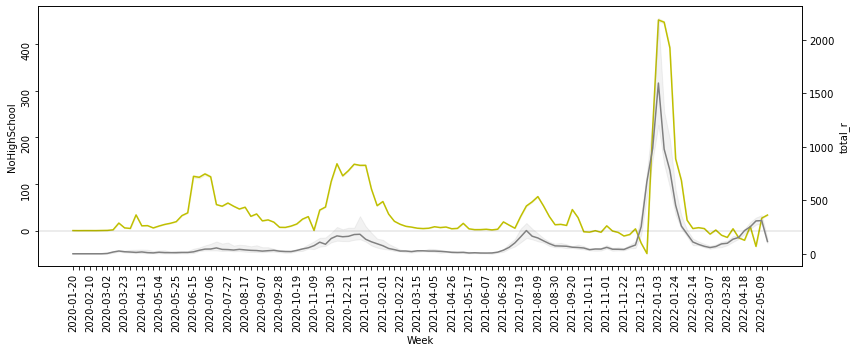

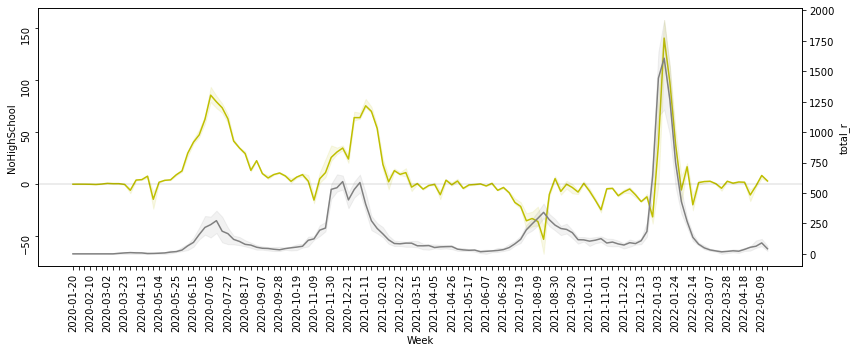

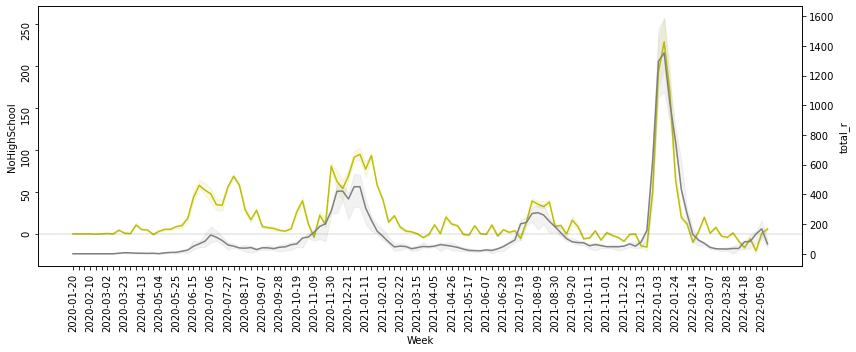

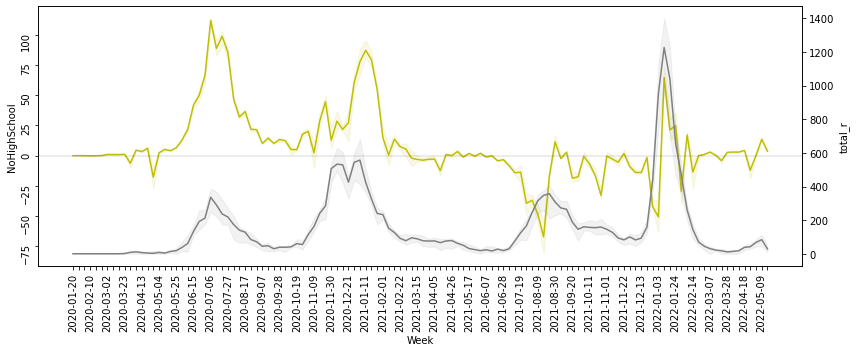

In [26]:
### Plot each variable for the top 10 covid counties 
def linePlot_withIQR(df, x_col_name, fist_y_col_name, second_y_col_name, plot_second_y=True, nth_ticks=3, save_fig=False, save_fig_path='', save_fig_filename='lineplot.png'):
    fig,ax =  plt.subplots(figsize = (12, 5))
    
    # plot 1st y-axis
    sns.lineplot( x = x_col_name, y = fist_y_col_name, 
                 estimator='median', ci=None, 
                 color = 'y', data = df, 
                 ax = ax)  
    bounds = df.groupby(x_col_name)[fist_y_col_name].quantile((0.25,0.75)).unstack()
    ax.fill_between(x=bounds.index,y1=bounds.iloc[:,0],y2=bounds.iloc[:,1],alpha=0.1,
                   color='y')
    
    # Hide every n-th ticks
    for index, label in enumerate(ax.xaxis.get_ticklabels()):
        if index % nth_ticks != 0:
            label.set_visible(False)
    
    # plot 2nd y-axis
    if plot_second_y:
        ax0_1 = ax.twinx()
        sns.lineplot( x = x_col_name, y = second_y_col_name, 
                     estimator='median', ci=None,
                     color = 'gray', data = df, 
                     ax = ax0_1)  
        bounds = df.groupby(x_col_name)[second_y_col_name].quantile((0.25,0.75)).unstack()
        ax0_1.fill_between(x=bounds.index,y1=bounds.iloc[:,0],y2=bounds.iloc[:,1],alpha=0.1,
                           color='gray')
        
        # Hide every n-th ticks
        for index, label in enumerate(ax0_1.xaxis.get_ticklabels()):
            if index % nth_ticks != 0:
                label.set_visible(False)

    # Add a horizontal line
    ax.axhline(linewidth=0.15, color = 'black')
    ax.tick_params(labelrotation = 90)
    fig.tight_layout()  # fig.tight_layout(pad = 1.2)

    if save_fig:
        fig.savefig(f"{save_fig_path}\\{save_fig_filename}", dpi=300)
        
for county in tqdm(County_list.NAME.values.tolist()):
    plot_df = gtwr_full_results.loc[gtwr_full_results.NAME == county]
    linePlot_withIQR(plot_df, 'Week','NoHighSchool', 'total_r', plot_second_y=True, 
                     save_fig=True, save_fig_path=os.getcwd(), 
                     save_fig_filename='./Coeff_linePlot_byCounty/{0}_line_plot_NoHighSchool.png'.format(county))

In [16]:
County_median=gtwr_full_results.groupby('NAME')['total_r'].median().reset_index()
County_list=County_median[County_median['total_r']>50][['NAME']]


In [21]:
County_median

,NAME
0,Alameda
9,Fresno
12,Imperial
15,Kings
18,Los Angeles
23,Merced
32,Riverside
33,Sacramento
36,San Diego
37,San Francisco
